### SanFrancisco Salary Employees DataBase.
**This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.**


In [1]:
#loading the Necessary liberary for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the Database!

df = pd.read_csv('Salaries.csv', low_memory=False)

In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.info()
''' # BasePay	OvertimePay	 OtherPay	Benefits are object.. needs to become Floats. as they are representing Salaries.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


' # BasePay\tOvertimePay\t OtherPay\tBenefits are object.. needs to become Floats. as they are representing Salaries.\n'

# DATA WRANGLING

In [5]:

'''TotalPay and TotalPayBenfits are in Negative under the minimum section will be fixed in Data Cleaning.'''
df.describe()  

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [6]:

'''BasePay has a null values. which it can not be accepted
will be replaced with Average BasePay'''
df.isna().sum() 

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [7]:
# check for duplicated rows 
df.duplicated().sum()

0

### DATA CLEANING 

In [8]:
# str. found  ('Not Provided')  needs to be removed and then covert the column into float
df[df['BasePay'] == 'Not Provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,NaN,San Francisco,NaN


In [9]:
#removing the columns
df.drop(df.index[[148646,148650,148651,148652]], inplace =True)

In [10]:
df[df['BasePay'] == 'Not Provided']  #checking again for the str. as we can see it is cleared.

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [11]:
#coverting BasePay to float
df['BasePay'] = df['BasePay'].astype(float)

In [12]:
#filling the null values with the average salary
df['BasePay'].fillna(df.BasePay.mean(), inplace =True)

In [13]:
df.head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [14]:
#convert benefits, overtimepay, otherpay into float.
df.Benefits = df.Benefits.astype(float)
df.OvertimePay = df.OvertimePay.astype(float)
df.OtherPay = df.OtherPay.astype(float)

In [15]:
df['Benefits'].fillna(0, inplace =True) #removing the NaN under the Benefits and replacing it with 0

In [16]:
df.describe() # we can see Negative Values in the minimum area. investigate further.

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,0.0
mean,74325.500047,66325.448841,5066.059886,3648.767297,18924.742068,74770.333901,93695.075969,2012.522603,NaN
std,42911.703176,42677.520938,11454.380559,8056.601866,17165.229731,50516.196009,62792.497391,1.117526,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37163.250000,33846.057500,0.000000,0.000000,0.000000,36169.955000,44073.337500,2012.000000,NaN
50%,74325.500000,65092.190000,0.000000,811.270000,23217.135000,71427.240000,92406.020000,2013.000000,NaN
75%,111487.750000,94609.715000,4658.175000,4236.065000,33468.980000,105842.960000,132877.992500,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [17]:
df[df['TotalPayBenefits'] < 0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110528,110529,Timothy E Gibson,Police Officer 3,66325.448841,0.0,0.00,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110529,110530,Mark E Laherty,Police Officer 3,66325.448841,0.0,0.00,-8.20,0.00,-8.20,2013,NaN,San Francisco,NaN
110530,110531,David P Kucia,Police Officer 3,66325.448841,0.0,0.00,-33.89,0.00,-33.89,2013,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.000000,0.0,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [18]:
#removing the Negative Value from all columns
Columns = ['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']

for c in Columns:
    df[c] = df[c].apply(lambda x : x*-1 if x <0 else x)

In [19]:
#checking the result that minimum is now 0 instead of (-)
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,0.0
mean,74325.500047,66325.461773,5066.059887,3648.872016,18924.742857,74770.342218,93695.084889,2012.522603,NaN
std,42911.703176,42677.500840,11454.380559,8056.554438,17165.228861,50516.183699,62792.484082,1.117526,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,NaN
25%,37163.250000,33846.057500,0.000000,0.000000,0.000000,36169.955000,44073.337500,2012.000000,NaN
50%,74325.500000,65092.190000,0.000000,811.340000,23217.135000,71427.240000,92406.020000,2013.000000,NaN
75%,111487.750000,94609.715000,4658.175000,4236.575000,33468.980000,105842.960000,132877.992500,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [20]:
#removing ID column not needed
df.drop(columns='Id', inplace =True)

In [21]:
df.head(1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0.0,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [22]:
# BasePay is Zero which is not right
df[df['BasePay'] == 0 ]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
2896,JOHN PAYNE,MANAGER VII,0.0,0.00,142245.22,0.0,142245.22,142245.22,2011,NaN,San Francisco,NaN
3263,LAWRENCE BADINER,MANAGER VI,0.0,0.00,138191.99,0.0,138191.99,138191.99,2011,NaN,San Francisco,NaN
19058,PETER LEONARD,FIRE FIGHTER PARAMEDIC,0.0,1630.20,64356.03,0.0,65986.23,65986.23,2011,NaN,San Francisco,NaN
20834,MICHAEL COLLINS,POLICE OFFICER II,0.0,7815.78,52820.77,0.0,60636.55,60636.55,2011,NaN,San Francisco,NaN
21658,LINDA ZIMMERMAN,PUBLIC HEALTH NURSE,0.0,0.00,58441.60,0.0,58441.60,58441.60,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148645,Carolyn A Wilson,Human Services Technician,0.0,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148647,Joann Anderson,Communications Dispatcher 2,0.0,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148648,Leon Walker,Custodian,0.0,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT
148649,Roy I Tillery,Custodian,0.0,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,PT


In [23]:
df.drop(df.index[df['BasePay'] == 0 ], inplace =True) #removing rows that has BasePay = 0$

In [24]:
df[df['BasePay'] == 0 ] #checking to make sure all is cleaned

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


## Data is now clean and ready for EDA

**The Average BasePay Of all Employees per year from (2011-2014)** ?

In [25]:
df.groupby('Year').mean()['BasePay']

Year
2011    64400.991170
2012    66192.616985
2013    69576.866579
2014    67316.721920
Name: BasePay, dtype: float64

<AxesSubplot:>

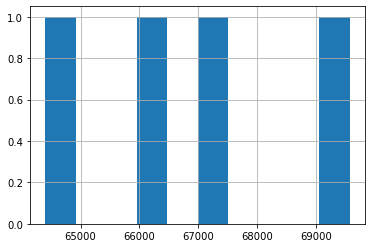

In [26]:
df.groupby('Year').mean()['BasePay'].hist()

**How many unique Jobs are existed ?**

In [27]:
df['JobTitle'].nunique()

2152

**What are the Top common Jobs ?**

In [28]:
df['JobTitle'].value_counts().head()

Transit Operator                6975
Special Nurse                   4355
Registered Nurse                3701
Public Svc Aide-Public Works    2514
Custodian                       2401
Name: JobTitle, dtype: int64

**How Many Jobs were occupied by 1 person in year 2013?**

In [41]:
(df[df.Year == 2013]['JobTitle'].value_counts() == 1).sum()

202

**How Many title had the word Chief in it?**

In [44]:
def chief(string):
    if 'chief' in (string.lower()):
        return True
    else:
        return False

In [45]:
df['JobTitle'].apply(lambda x: chief(x)).sum()

620

In [46]:
df.to_csv('Salaries.csv', index_label=False)